Comparison of the rules extracted from a tree with parameter maximum depth of 9:
- rule 1 (node 29/29): equal
- rule 2 (node 37/37): equal
- rule 3 (node 31/31): equal
- rule 4 (node 20/20): equal
- rule 5 (node 16/16): equal
- rule 6 (node 11/10): Hours per week $\leq 42.5$ instead of Country $>4.5$
- rule 7 (node 41/41): equal
- rule 8 (node 46/46): equal

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from baseline import print_rules
from util import CombinationClassifier
from tasks.adult import make_task_with_influential_and_uninfluential_modification as make_task

In [2]:
clf_a, clf_b, X, X_display, y, feature_names = make_task()

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[09:45:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:45:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:45:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "nestimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

In [4]:
mclass_diff = comparer.predict_mclass_diff(X)

## $(False,True)$

In [5]:
focus_class = '(False, True)'

In [6]:
class_names = np.array(['other', focus_class])

In [7]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    clf = CombinationClassifier(comparer, focus_class)
    y_pred = clf.predict(X)
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, y_pred)
    
    feature_importances = tree.feature_importances_
    feature_order = np.flip(np.argsort(feature_importances))
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_title('Relative feature importance')
    ax.scatter(feature_importances[np.flip(feature_order)],
               comparer.feature_names[np.flip(feature_order)])
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    y_test = mclass_diff == np.where(comparer.class_names == focus_class)[0][0]
    print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=y_test, precision=2)

    print(classification_report(y_test, tree.predict(X), target_names=class_names))

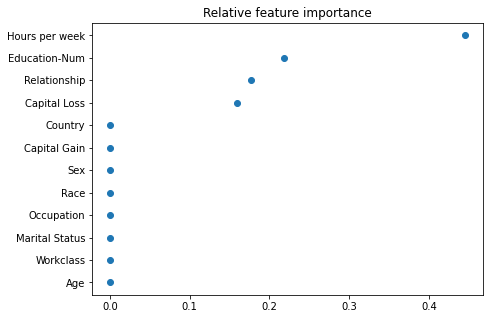

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


               precision    recall  f1-score   support

        other       0.99      1.00      0.99       963
(False, True)       0.00      0.00      0.00        14

     accuracy                           0.99       977
    macro avg       0.49      0.50      0.50       977
 weighted avg       0.97      0.99      0.98       977



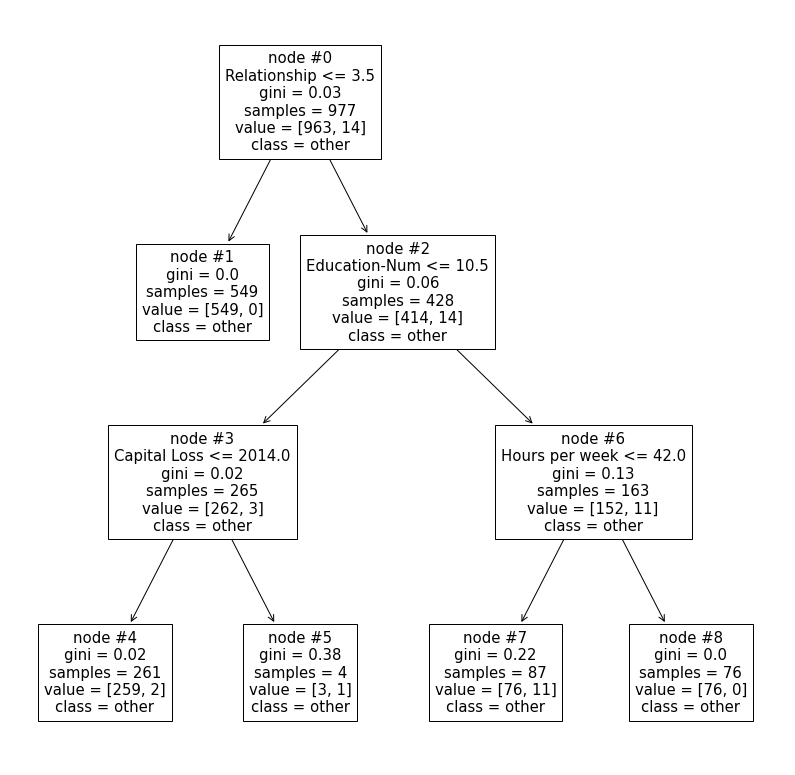

In [8]:
explain(max_depth=3)

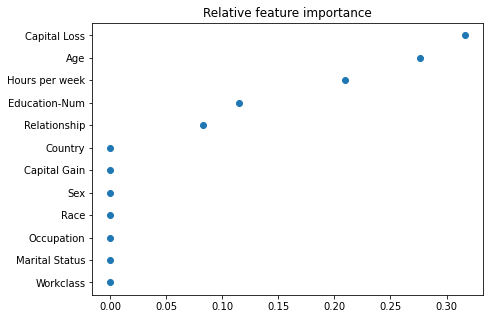

node #8: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
number of rules: 1
number of terms: 4 (4.0 avg. per rule)
               precision    recall  f1-score   support

        other       0.99      1.00      0.99       963
(False, True)       1.00      0.07      0.13        14

     accuracy                           0.99       977
    macro avg       0.99      0.54      0.56       977
 weighted avg       0.99      0.99      0.98       977



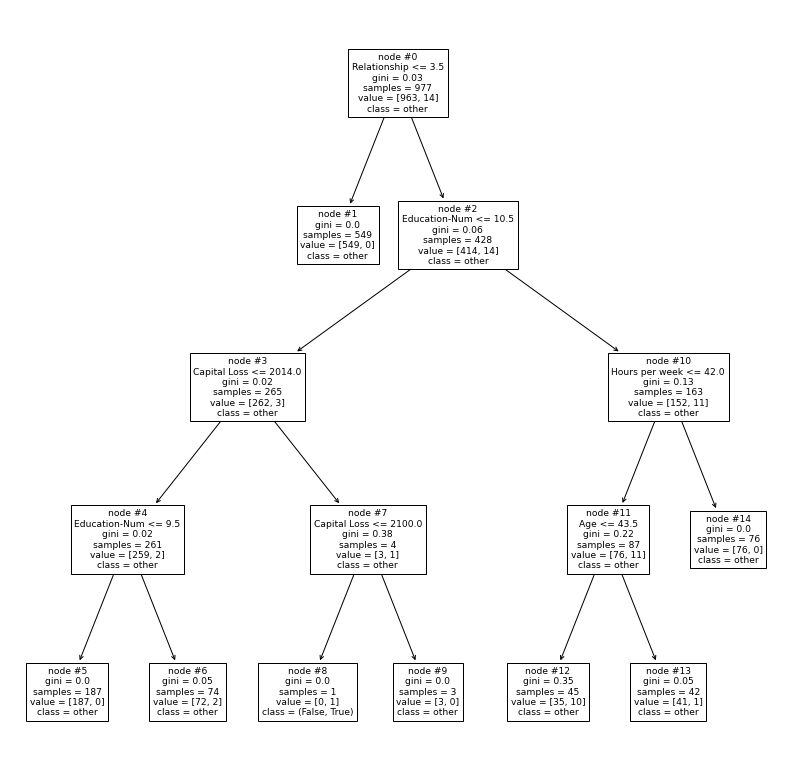

In [9]:
explain(max_depth=4)

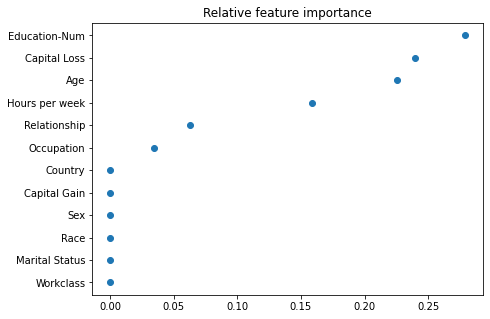

node #10: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
number of rules: 1
number of terms: 4 (4.0 avg. per rule)
               precision    recall  f1-score   support

        other       0.99      1.00      0.99       963
(False, True)       1.00      0.07      0.13        14

     accuracy                           0.99       977
    macro avg       0.99      0.54      0.56       977
 weighted avg       0.99      0.99      0.98       977



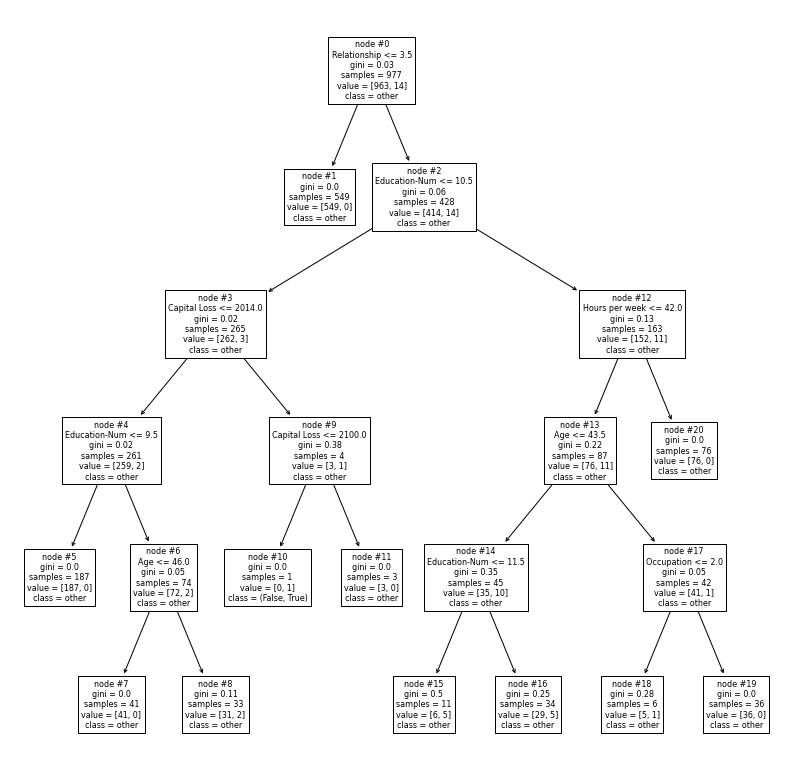

In [10]:
explain(max_depth=5)

- rule 1 (node 19/19): equal
- rule 2 (node 26/26): equal
- rule 3 (node 21/21): equal
- rule 4 (node 12/12): equal

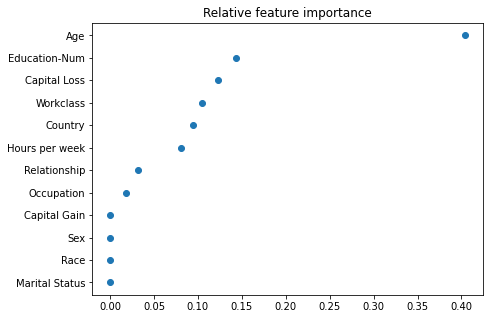

node #19: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) (covers 0.833 of 6 instances)
node #26: if (Age > 43.5) and (Workclass > 3.0) and (Education-Num > 10.5) and (Occupation <= 2.0) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 1 instances)
node #21: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #12: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
number of rules: 4
number of terms: 21 (5.2 avg. per rule)
               precision    recall  f1-score   support

        other       0.99      1.00      1.00       963
(False, True)       0.89      0.57      0.70        14

     a

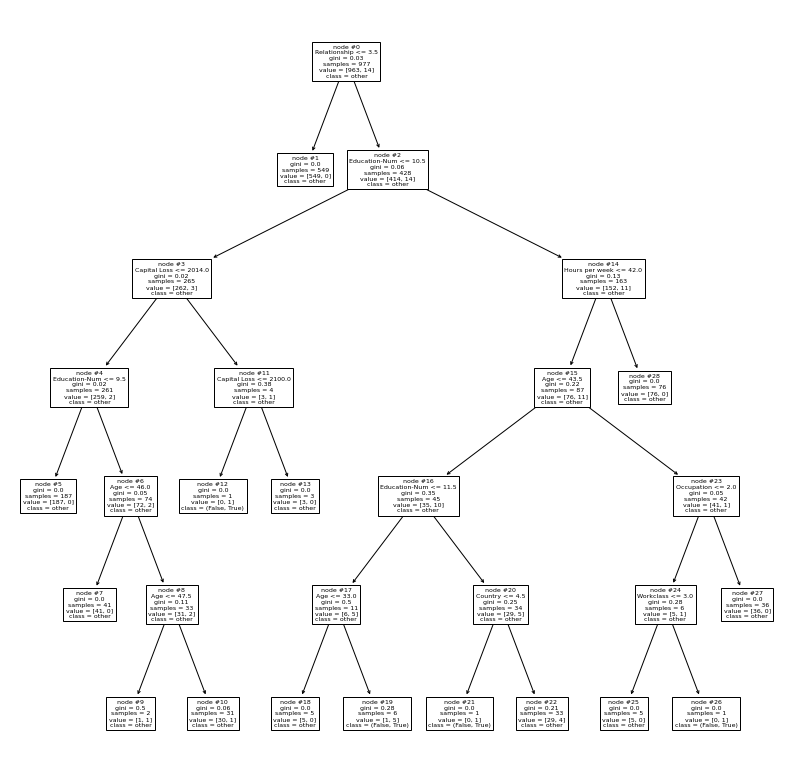

In [11]:
explain(max_depth=6)

- rule 1 (node 25/25): equal
- rule 2 (node 27/27): equal
- rule 3 (node 16/16): equal
- rule 4 (node 11/11): adds Occupation instead of Country
- rule 5 (node 34/34): equal

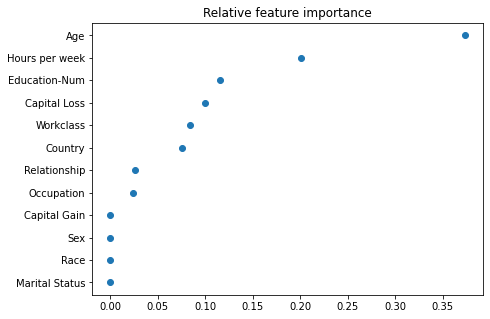

node #25: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 5 instances)
node #27: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #16: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
node #10: if (Age > 46.0) and (Age <= 47.5) and (Education-Num > 9.5) and (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss <= 2014.0) and (Hours per week <= 42.5) then class (False, True) (covers 1.0 of 1 instances)
node #34: if (Age > 43.5) and (Workclass > 3.0) and (Education-Num > 10.5) and (Occupation <= 2.0) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) 

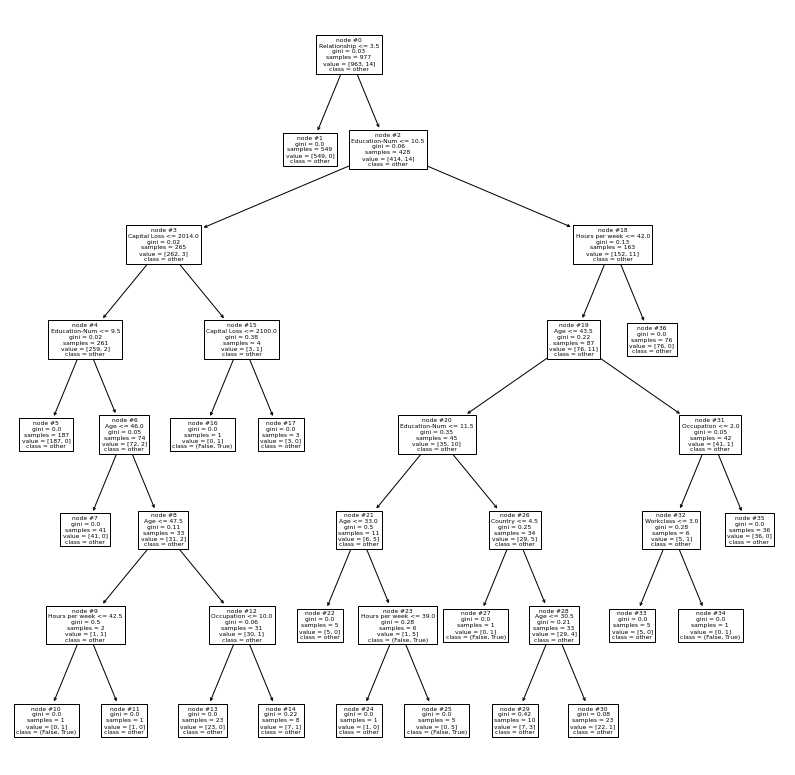

In [12]:
explain(max_depth=7)

Equal, except for:
- rule 4 (node 11/11): Discriminates on Country instead of Occupation

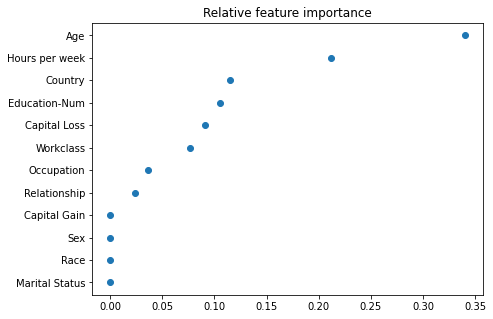

node #27: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 5 instances)
node #18: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
node #29: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #11: if (Age > 46.0) and (Age <= 47.5) and (Education-Num > 9.5) and (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss <= 2014.0) and (Country > 32.5) then class (False, True) (covers 1.0 of 1 instances)
node #40: if (Age > 43.5) and (Workclass > 3.0) and (Education-Num > 10.5) and (Occupation <= 2.0) and (Relationship > 3.5) and (Hours per week <= 42.0) then class (False, True) (covers 

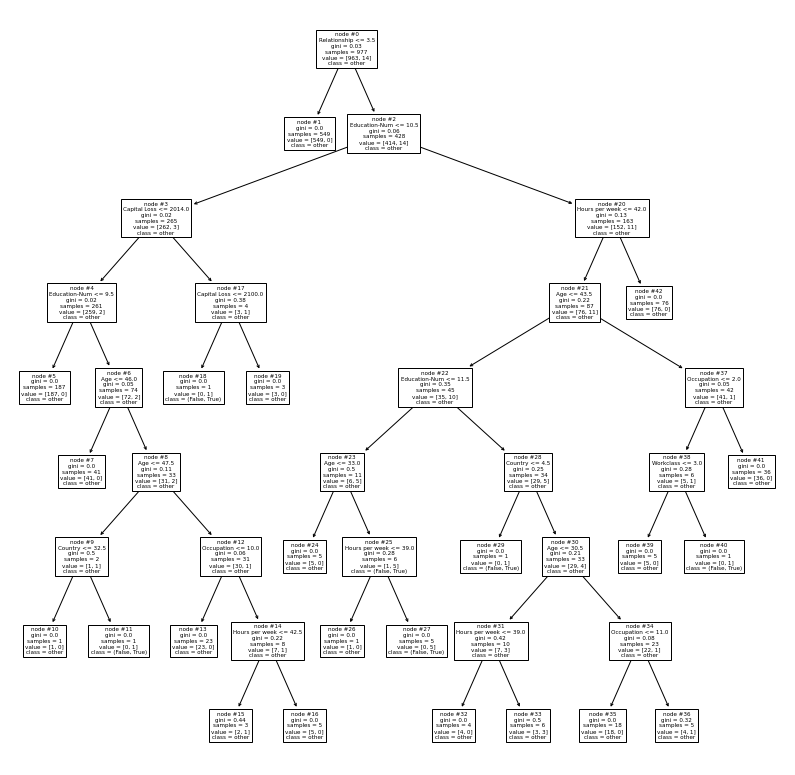

In [13]:
explain(max_depth=8)

This explanation matches the original explanation with max depth parameter set to 10. So with a simpler tree, it is able to explain more accurate, but the rules have the same complexity.

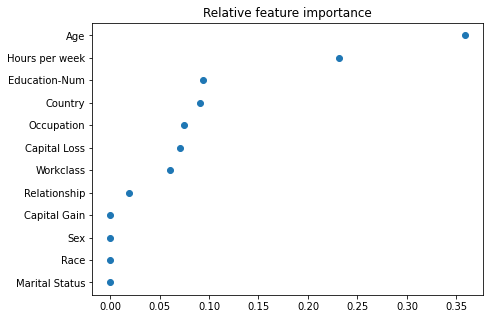

node #29: if (Age > 33.0) and (Age <= 43.5) and (Education-Num > 10.5) and (Education-Num <= 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) then class (False, True) (covers 1.0 of 5 instances)
node #37: if (Age > 27.5) and (Age <= 30.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week > 39.0) and (Hours per week <= 42.0) and (Country > 4.5) then class (False, True) (covers 1.0 of 3 instances)
node #31: if (Age <= 43.5) and (Education-Num > 11.5) and (Relationship > 3.5) and (Hours per week <= 42.0) and (Country <= 4.5) then class (False, True) (covers 1.0 of 1 instances)
node #20: if (Education-Num <= 10.5) and (Relationship > 3.5) and (Capital Loss > 2014.0) and (Capital Loss <= 2100.0) then class (False, True) (covers 1.0 of 1 instances)
node #16: if (Age > 47.5) and (Age <= 52.5) and (Education-Num > 9.5) and (Education-Num <= 10.5) and (Occupation > 10.0) and (Relationship > 3.5) and (Capital Loss <= 2014.0) and (Hours

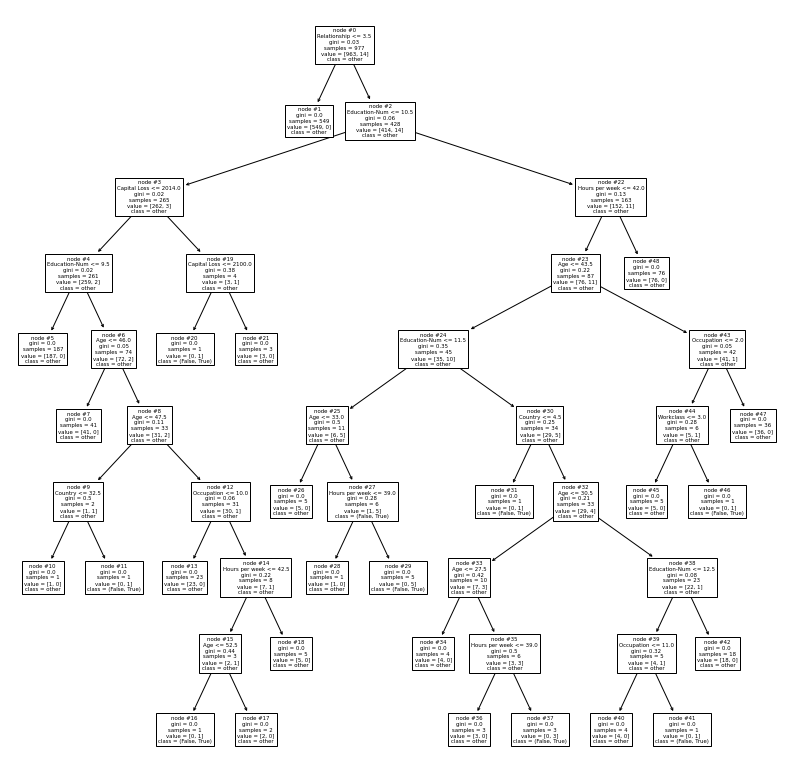

In [14]:
explain(max_depth=9)